In [119]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [120]:
heart=pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [121]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [122]:
heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [123]:
heart.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [124]:
heart.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [125]:
heart_numerical=['age','anameia','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine', 'serum_sodium','time']
heart_categorical=['diabetes','high_blood_pressure','sex','smoking']

H:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

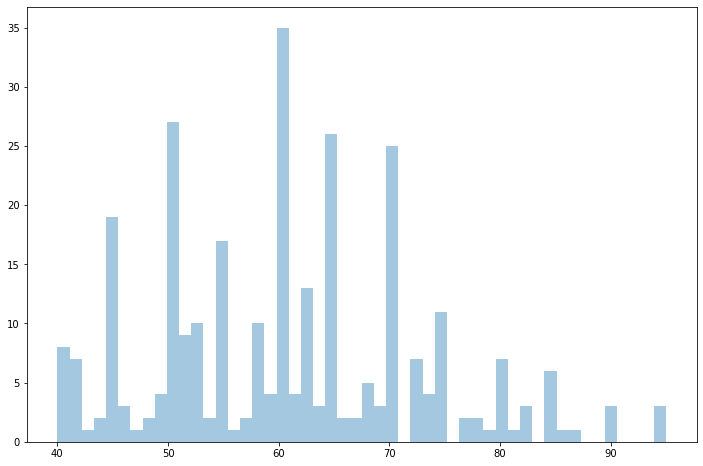

In [126]:
plt.figure(figsize=(12,8))
sns.distplot(x=heart['age'],bins=50,kde=False)


<AxesSubplot:>

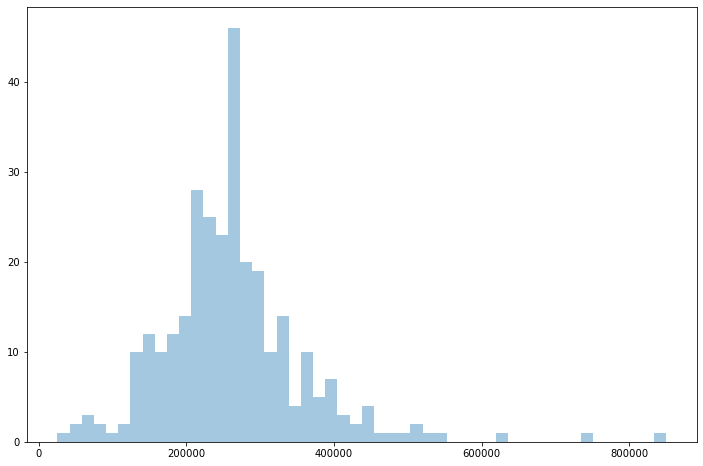

In [127]:
plt.figure(figsize=(12,8))
sns.distplot(x=heart['platelets'],bins=50,kde=False)

<AxesSubplot:ylabel='count'>

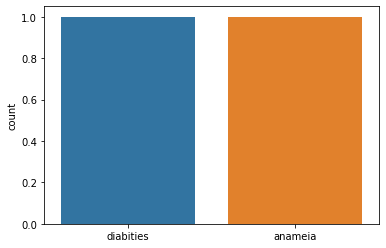

In [128]:
sns.countplot(x=['diabities','anameia'],data=heart,hue_order='sex')

<Figure size 864x864 with 0 Axes>

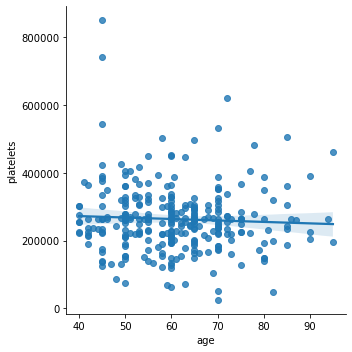

In [129]:
plt.figure(figsize=(12,12))
sns.lmplot(x='age',y='platelets',data=heart)

In [130]:
# for subplots
def subplts(r=1, c=1, fs=(20, 8)):
    return plt.subplots(r, c, figsize=fs)

# count plot
def plot_count(x, ax, d=heart):
    sns.countplot(data=d, x=x, ax=ax)

# histogram without hue
def plot_hist(x, ax, d=heart, kde=True, log=False):
    sns.histplot(data=d, x=x, ax=ax, kde=kde, log_scale=log)

# histogram with hue
def plot_hist_hue(x, hu, ax, d=heart, multi="stack", kde=True, log=False):
    sns.histplot(data=d, x=x, ax=ax, hue=hu, kde=kde, multiple=multi, log_scale=log)
    
# boxplot single
def plot_box(x, ax, d=heart):
    sns.boxplot(data=d, x=x, ax=ax)
    
# boxplot with one categorical
def plot_boxcat(x, y, ax, d=heart):
    sns.boxplot(data=d, x=x, y=y, ax=ax)
    
# pie chart using pandas
def plot_pie(feat, ax, title):
    heart[f"{feat}"].value_counts().plot.pie(ax=ax, autopct="%1.1f%%",
                                          shadow=True, explode=[0, 0.1]).set_title(f"{title}")


In [131]:
heart.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


<AxesSubplot:>

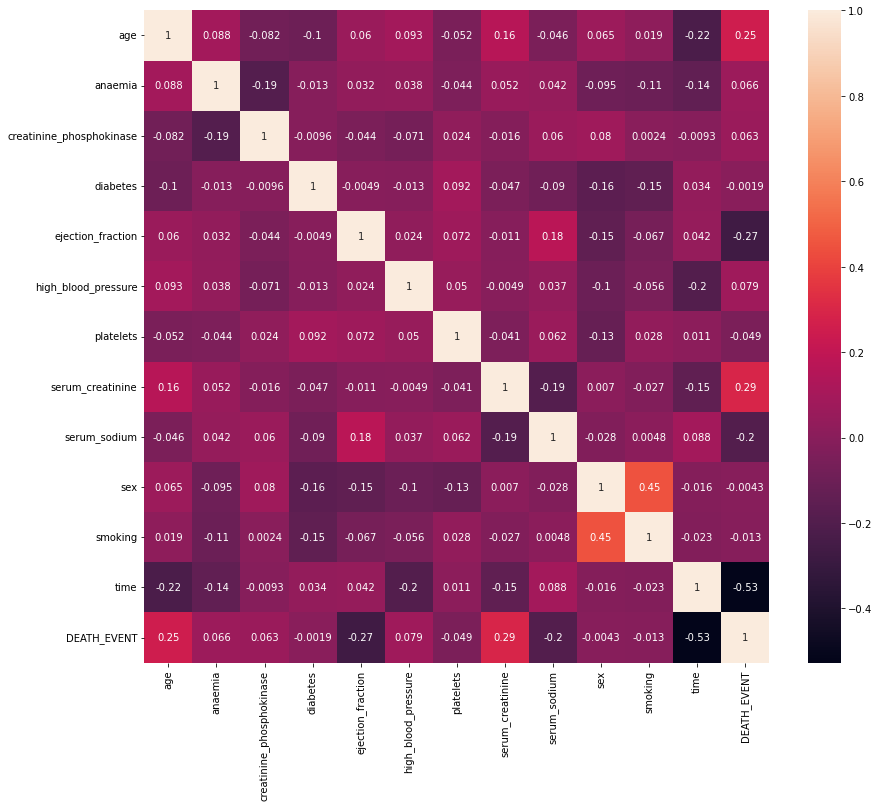

In [132]:
plt.figure(figsize=(14,12))
sns.heatmap(heart.corr(),annot=True)

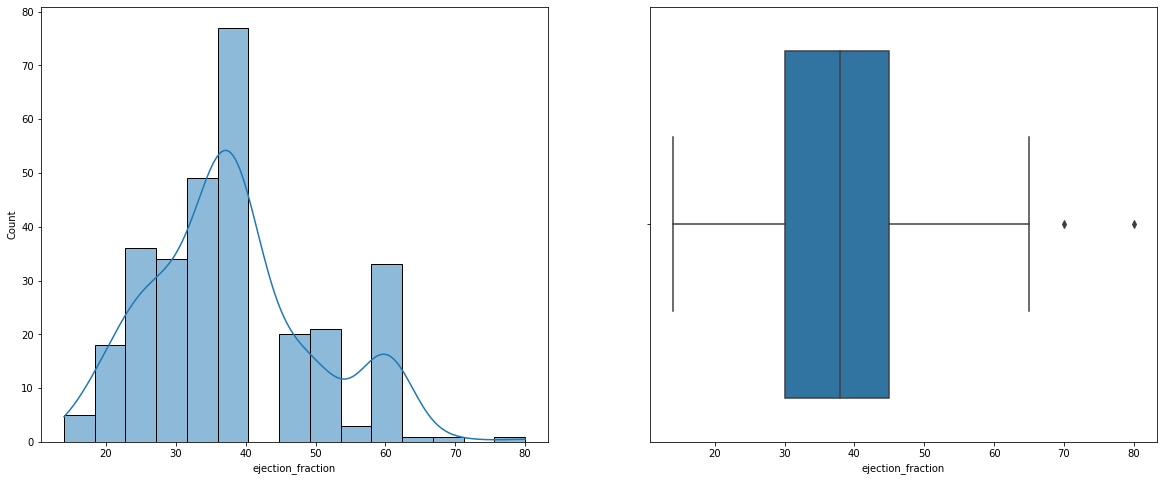

In [133]:
fig, ax = subplts(1, 2)

plot_hist("ejection_fraction", ax[0])
plot_box("ejection_fraction", ax[1])

plt.show()

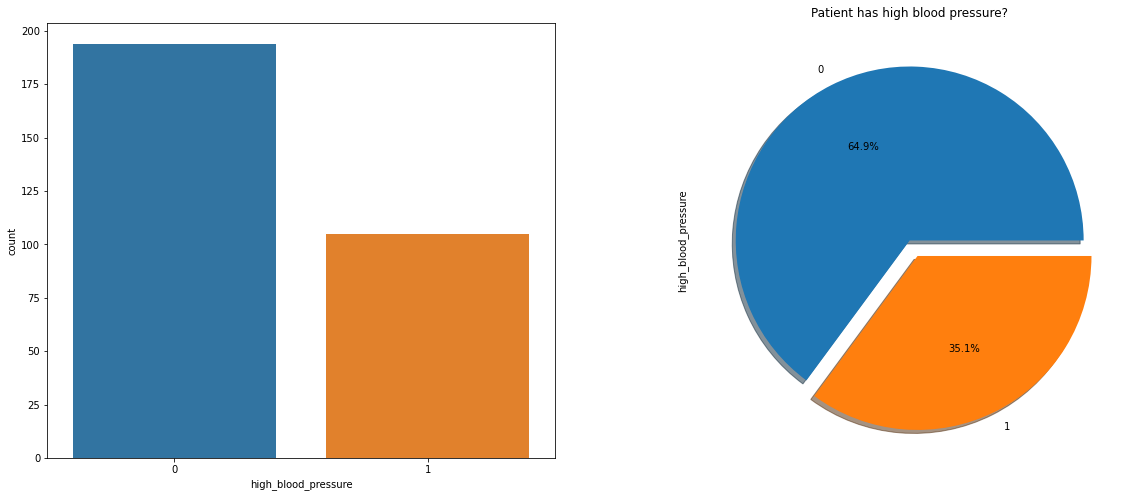

In [134]:
fig, ax = subplts(1, 2)

plot_count("high_blood_pressure", ax[0])
plot_pie("high_blood_pressure", ax[1], "Patient has high blood pressure?")

plt.show()


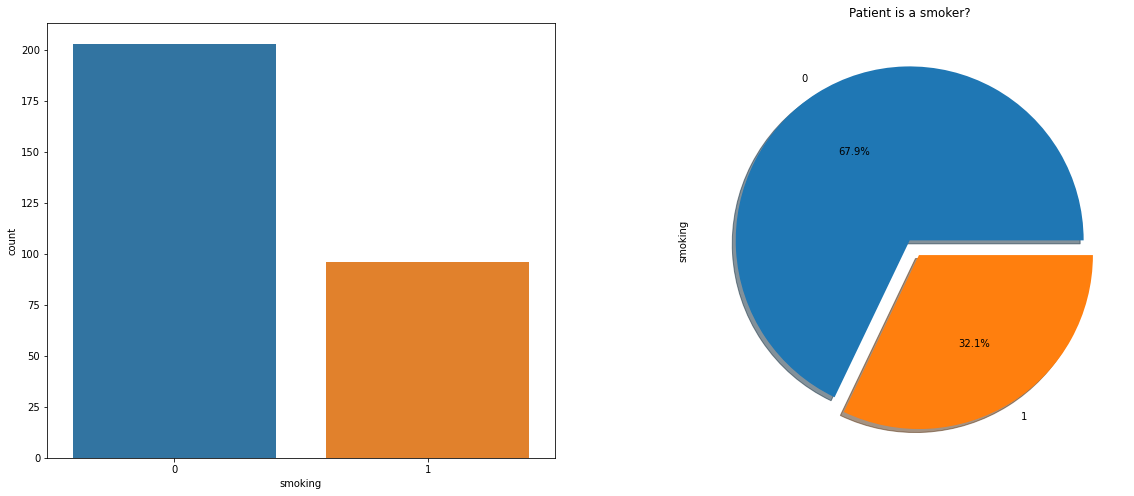

In [135]:
fig, ax = subplts(1, 2)

plot_count("smoking", ax[0])
plot_pie("smoking", ax[1], "Patient is a smoker?")

plt.show()

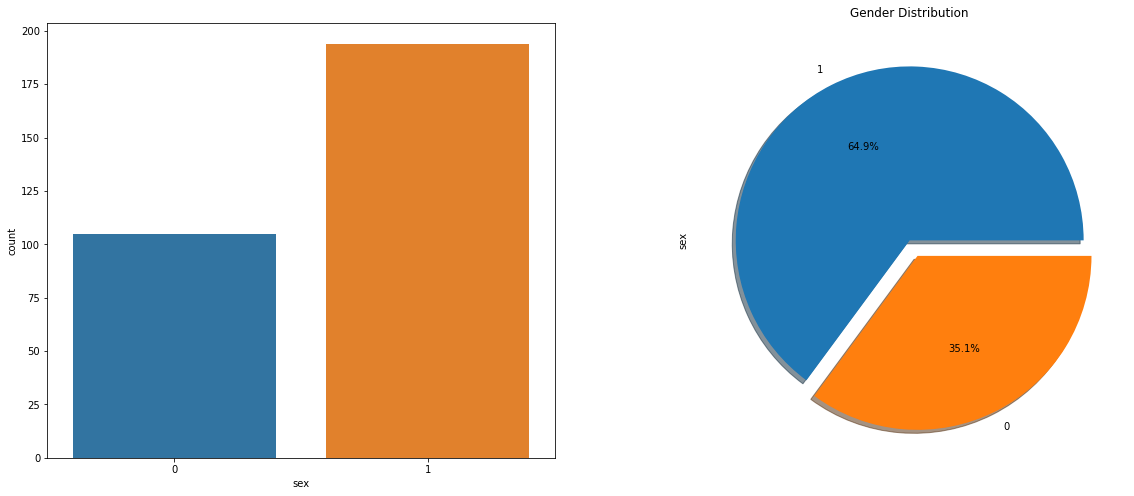

In [136]:
fig, ax = subplts(1, 2)

plot_count("sex", ax[0])
plot_pie("sex", ax[1], "Gender Distribution")

plt.show()

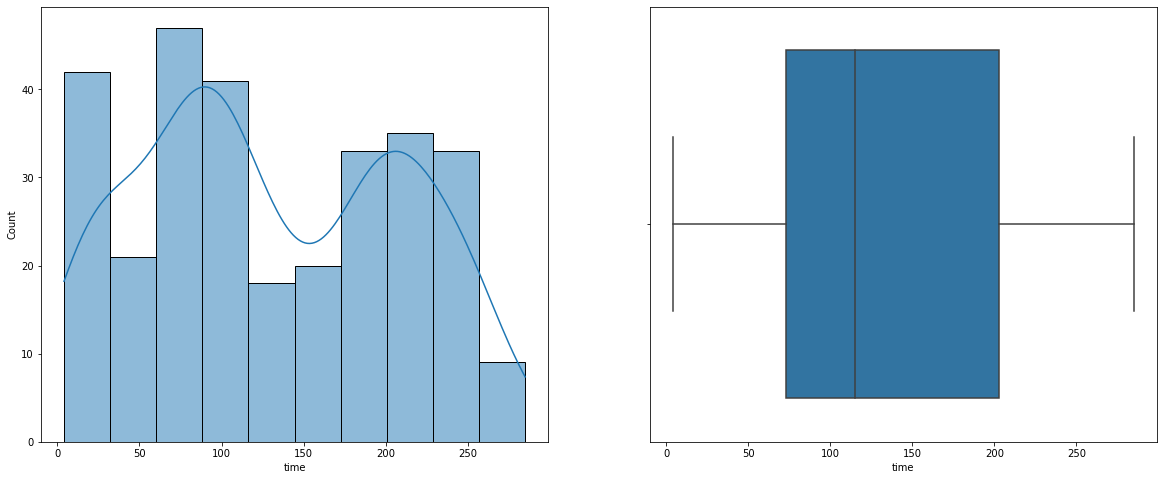

In [137]:
fig, ax = subplts(1, 2)

plot_hist("time", ax[0])
plot_box("time", ax[1])

plt.show()

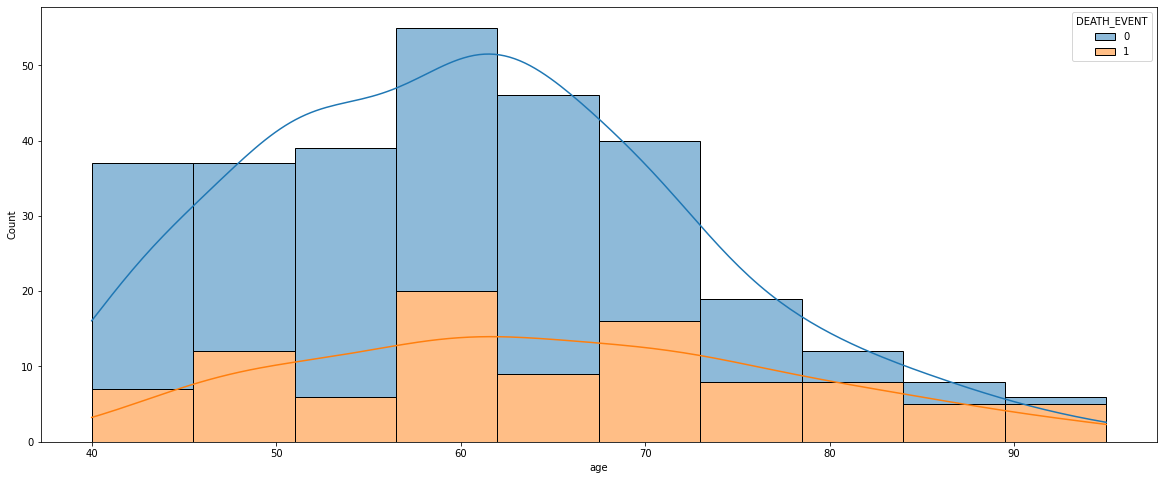

In [138]:
fig, ax = subplts()

plot_hist_hue("age", "DEATH_EVENT", ax)
plt.show()


In [139]:
df1 = heart[(heart["diabetes"] == 0) & (heart["DEATH_EVENT"] == 1)]
df2 = heart[(heart["diabetes"] == 1) & (heart["DEATH_EVENT"] == 1)]
comb1 = pd.concat([df1, df2])

df3 = heart[(heart["high_blood_pressure"] == 0) & (heart["DEATH_EVENT"] == 1)]
df4 = heart[(heart["high_blood_pressure"] == 1) & (heart["DEATH_EVENT"] == 1)]
comb2 = pd.concat([df3, df4])

df5 = heart[(heart["sex"] == 0) & (heart["DEATH_EVENT"] == 1)]
df6 = heart[(heart["sex"] == 1) & (heart["DEATH_EVENT"] == 1)]
comb3 = pd.concat([df5,df6])

df7 = heart[(heart["smoking"] == 0) & (heart["DEATH_EVENT"] == 1)]
df8 = heart[(heart["smoking"] == 1) & (heart["DEATH_EVENT"] == 1)]
comb4 = pd.concat([df7, df8])

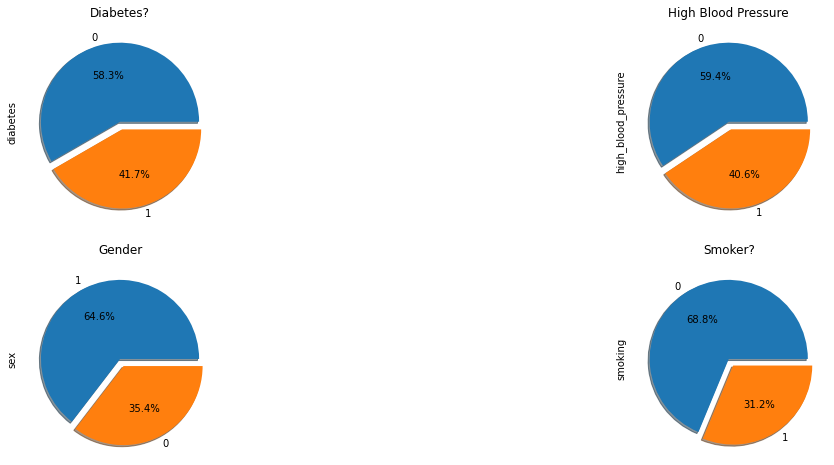

In [140]:
fig, ax = subplts(2, 2)

comb1["diabetes"].value_counts().plot.pie(ax=ax[0, 0], autopct="%1.1f%%", explode=[0, 0.1], shadow=True).set_title("Diabetes?")
comb2["high_blood_pressure"].value_counts().plot.pie(ax=ax[0, 1], autopct="%1.1f%%", explode=[0, 0.1], shadow=True).set_title("High Blood Pressure")
comb3["sex"].value_counts().plot.pie(ax=ax[1, 0], autopct="%1.1f%%", explode=[0, 0.1], shadow=True).set_title("Gender")
comb4["smoking"].value_counts().plot.pie(ax=ax[1, 1], autopct="%1.1f%%", explode=[0, 0.1], shadow=True).set_title("Smoker?")

plt.show()

In [141]:

X = heart.drop(columns=["DEATH_EVENT"])
y = heart["DEATH_EVENT"]

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.2, random_state=3301)

print("Training set size: ", X_train.shape, y_train.shape)
print("Testing set size: ", X_test.shape, y_test.shape)

Training set size:  (239, 12) (239,)
Testing set size:  (60, 12) (60,)


In [150]:
def comp_esti(esti):
    esti.fit(X_train, y_train)
    esti_test_preds = esti.predict(X_test)
    
    print(f"{esti} Accuracy score: ", accuracy_score(y_test, esti_test_preds))
    print(f"\n{esti} Classification report:\n", classification_report(y_test, esti_test_preds, digits=6))
    
    # confusion matrix
    cf_mat = confusion_matrix(y_test, esti_test_preds)
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(data=cf_mat, annot=True, ax=ax)
    plt.show()

RandomForestClassifier(random_state=3301) Accuracy score:  0.9166666666666666

RandomForestClassifier(random_state=3301) Classification report:
               precision    recall  f1-score   support

           0   0.911111  0.976190  0.942529        42
           1   0.933333  0.777778  0.848485        18

    accuracy                       0.916667        60
   macro avg   0.922222  0.876984  0.895507        60
weighted avg   0.917778  0.916667  0.914316        60



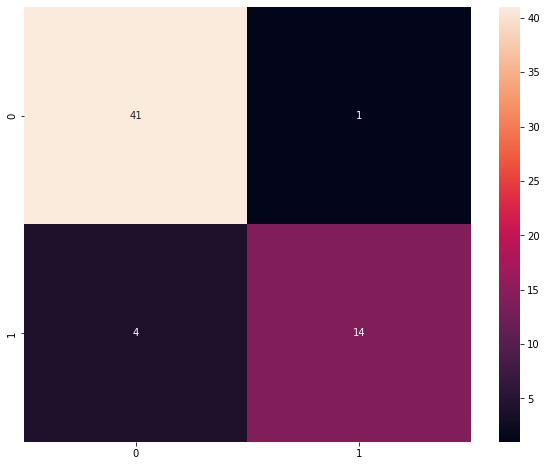

SVC() Accuracy score:  0.7

SVC() Classification report:
               precision    recall  f1-score   support

           0   0.700000  1.000000  0.823529        42
           1   0.000000  0.000000  0.000000        18

    accuracy                       0.700000        60
   macro avg   0.350000  0.500000  0.411765        60
weighted avg   0.490000  0.700000  0.576471        60



H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
H:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


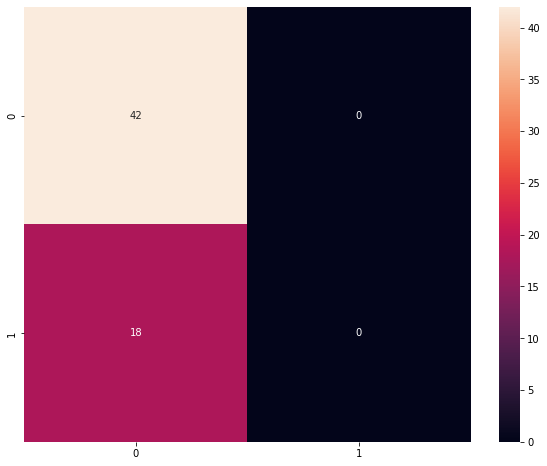

AdaBoostClassifier(random_state=3301) Accuracy score:  0.8333333333333334

AdaBoostClassifier(random_state=3301) Classification report:
               precision    recall  f1-score   support

           0   0.863636  0.904762  0.883721        42
           1   0.750000  0.666667  0.705882        18

    accuracy                       0.833333        60
   macro avg   0.806818  0.785714  0.794802        60
weighted avg   0.829545  0.833333  0.830369        60



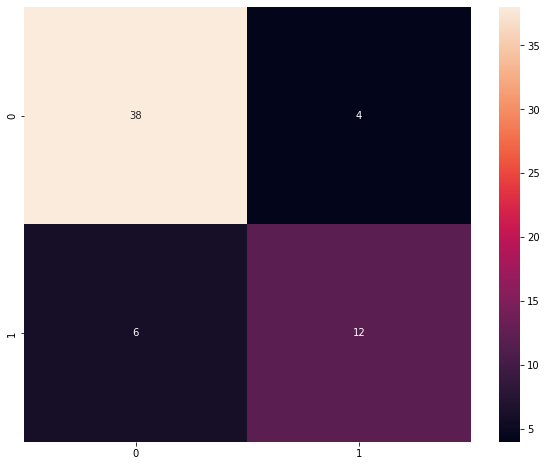

GradientBoostingClassifier(random_state=3301) Accuracy score:  0.85

GradientBoostingClassifier(random_state=3301) Classification report:
               precision    recall  f1-score   support

           0   0.902439  0.880952  0.891566        42
           1   0.736842  0.777778  0.756757        18

    accuracy                       0.850000        60
   macro avg   0.819641  0.829365  0.824162        60
weighted avg   0.852760  0.850000  0.851123        60



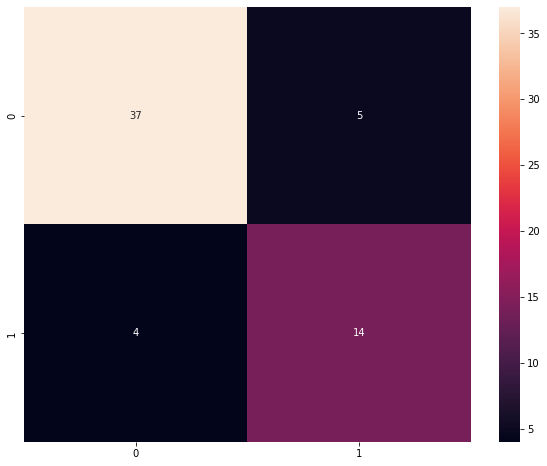

LogisticRegression(random_state=3301) Accuracy score:  0.8666666666666667

LogisticRegression(random_state=3301) Classification report:
               precision    recall  f1-score   support

           0   0.904762  0.904762  0.904762        42
           1   0.777778  0.777778  0.777778        18

    accuracy                       0.866667        60
   macro avg   0.841270  0.841270  0.841270        60
weighted avg   0.866667  0.866667  0.866667        60



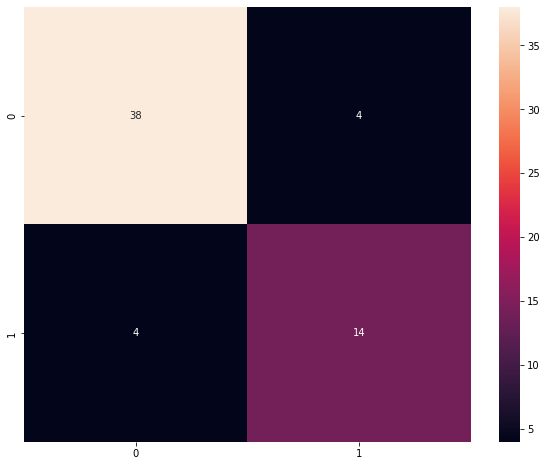

DecisionTreeClassifier(random_state=3301) Accuracy score:  0.8166666666666667

DecisionTreeClassifier(random_state=3301) Classification report:
               precision    recall  f1-score   support

           0   0.860465  0.880952  0.870588        42
           1   0.705882  0.666667  0.685714        18

    accuracy                       0.816667        60
   macro avg   0.783174  0.773810  0.778151        60
weighted avg   0.814090  0.816667  0.815126        60



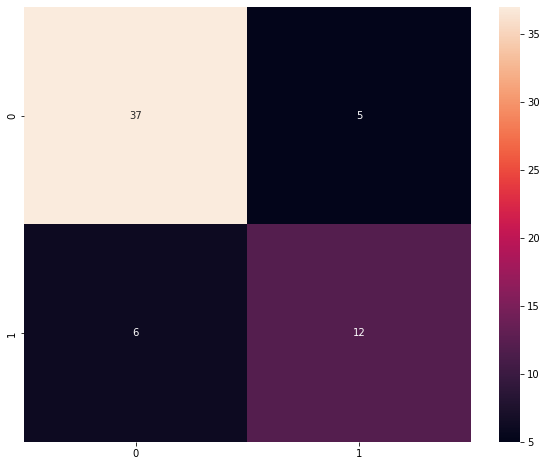

KNeighborsClassifier() Accuracy score:  0.6

KNeighborsClassifier() Classification report:
               precision    recall  f1-score   support

           0   0.695652  0.761905  0.727273        42
           1   0.285714  0.222222  0.250000        18

    accuracy                       0.600000        60
   macro avg   0.490683  0.492063  0.488636        60
weighted avg   0.572671  0.600000  0.584091        60



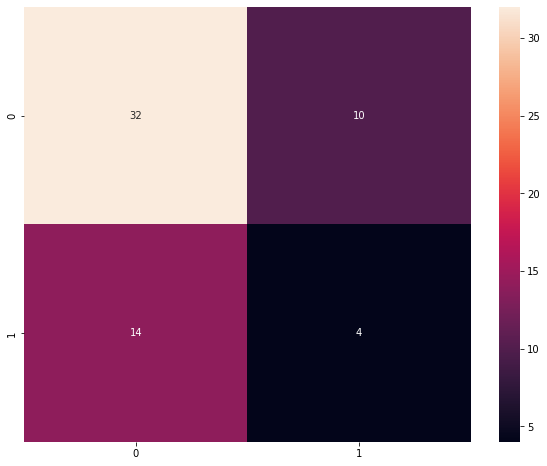

In [151]:
estimators = [
    RandomForestClassifier(random_state=3301),
    SVC(),
    AdaBoostClassifier(random_state=3301),
    GradientBoostingClassifier(random_state=3301),
    LogisticRegression(random_state=3301),
    DecisionTreeClassifier(random_state=3301),
    KNeighborsClassifier()
]

for esti in estimators:
    comp_esti(esti)